# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [94]:
import numpy as num #importing library
def check_input(arr): #funtions decalaration
  if not isinstance(arr[0][0],int): #integar value check
    return False
  length=len(arr)
  for i in range(length): #row check if common or not
    if any (j==0 for j in arr[i]):
      return False
    col=len(arr[i])
    rowset=set(arr[i])
    if len(rowset)!=col:
      return False

  for j in zip(*arr): #column check if common or not
    row=len(j)
    colset=set(j)
    if len(colset)!=row:
      return False

  return True 


test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


In [95]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],    #test matrix 1
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4], #test matrix 2
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'], #test matrix 3
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [96]:
import pandas as pd #importing library
work=pd.read_csv('https://raw.githubusercontent.com/Mabdullahatif/L216225_Assigment1/main/StudentMarkSheet.csv')
print(work.info()) #printing information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB
None


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [97]:
print(work.shape[0])             #Number of rows before
before=work.shape[0]
print(work.isnull().sum().sum()) #Number of rows containing null data
null=work.isnull().sum().sum()
after=before-null 
print(after)                     #Number of rows after
work.dropna(inplace=True)        #Removing all null enteries

200
4
196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [98]:
print(work[['Exam name', 'Marks']].where(work['Student name']=='James Walker')) #Basic code for printing specific rows/enteries/columns

    Exam name  Marks
0     Biology   31.0
1         NaN    NaN
2         NaN    NaN
3         NaN    NaN
4         NaN    NaN
..        ...    ...
195       NaN    NaN
196       NaN    NaN
197       NaN    NaN
198       NaN    NaN
199       NaN    NaN

[196 rows x 2 columns]


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [99]:
import matplotlib.pyplot as plt #importing library
sub=[] #subject array
avgmarks=[] #avergae marks array
for subject in set(work['Exam name']): #loop for running and filling both arrays
  avgm=work['Marks'].where(work['Exam name']==subject)  #Average marks calculations
  sub.append(subject) #inserting subject name in array
  avgmarks.append(avgm.mean()) #inserting average marks in array
  print({subject},avgm.mean())  #printing each subjects average

{'Mathematics'} 48.97222222222222
{'Biology'} 47.89473684210526
{'Sociology'} 56.026315789473685
{'Physics'} 51.76190476190476
{'Philosophy'} 47.270270270270274
{'Chemistry'} 50.57692307692308


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

['Mathematics', 'Biology', 'Sociology', 'Physics', 'Philosophy', 'Chemistry']
[48.97222222222222, 47.89473684210526, 56.026315789473685, 51.76190476190476, 47.270270270270274, 50.57692307692308]
<BarContainer object of 6 artists>


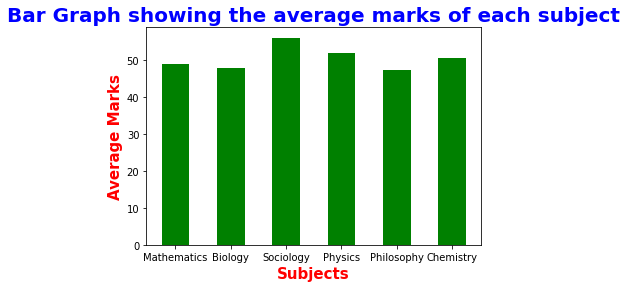

In [100]:
import matplotlib.pyplot as plt #importing library
print(sub)
print(avgmarks)
plt.xlabel('Subjects',color='red',fontsize= 15, fontweight='bold')
plt.ylabel('Average Marks',color='red',fontsize= 15, fontweight='bold')
plt.title('Bar Graph showing the average marks of each subject',color='blue',fontsize= 20, fontweight='bold')
graph=plt.bar(sub,avgmarks,color='green',width=0.5) #plotting bar graph using red color
print(graph)

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

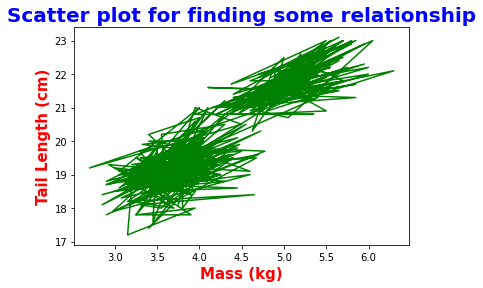

In [101]:
import pandas as pd           #importing library 
import matplotlib.pyplot as plt
cat=pd.read_csv('https://raw.githubusercontent.com/Mabdullahatif/L216225_Assigment1/main/CatData.csv')
  
cat.dropna()                  #dropping all null enteries

mass=cat['Mass (kg)']         #x axis mass
tail=cat['Tail Length (cm)']  #y axis tail

plt.xlabel('Mass (kg)',color='red',fontsize= 15, fontweight='bold')
plt.ylabel('Tail Length (cm)',color='red',fontsize= 15, fontweight='bold')
plt.title('Scatter plot for finding some relationship',color='blue',fontsize= 20, fontweight='bold')

graph=plt.plot(mass,tail,color='green')     #sample Run for graph
print(graph)

**Part B** - Identify the independant and dependant variables (comment answer below)

In [102]:
# dependant variable: Tail Length (cm)
# independant variable: Mass (kg)

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


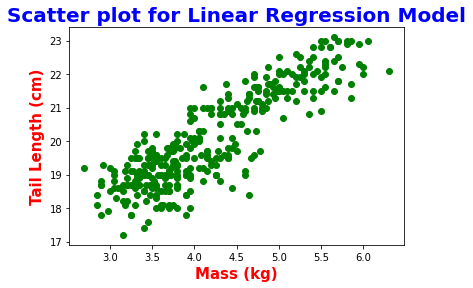

Data :  342
Train :  273
Test :  69


In [107]:
import pandas as pd #importing library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
data=pd.read_csv('https://raw.githubusercontent.com/Mabdullahatif/L216225_Assigment1/main/CatData.csv')
data.dropna()     #best practice to drop all null enteries and replace with (True)
#data=data.head()
to_find_regression=linear_model.LinearRegression() #built-in function call
trainx=np.array(data[['Mass (kg)']]) #x axis validation
trainy=np.array(data[['Tail Length (cm)']]) #y axis validation
to_find_regression.fit(trainx,trainy)


                                      #sample Run for scatter plot 
                                  
plt.xlabel('Mass (kg)',color='red',fontsize= 15, fontweight='bold')
plt.ylabel('Tail Length (cm)',color='red',fontsize= 15, fontweight='bold')
plt.title('Scatter plot for Linear Regression Model',color='blue',fontsize= 20, fontweight='bold')
print(plt.scatter(data['Mass (kg)'],data['Tail Length (cm)'],color='green'))
plt.show()
                        #taking 80% of the data for training and 20% for testing:
num=int(len(data)*0.8)
                                           #Training data:
training=data[:num]
                                            #testing data:
testing=data[num:]
print ("Data : ",len(data))
print ("Train : ",len(training))
print ("Test : ",len(testing))



**Part D** - Print the values for slope and y-intercept

In [104]:
#training the model:
coffi=to_find_regression.coef_  # slope
inter=to_find_regression.intercept_ #intercept
print(f"Slope : {to_find_regression.coef_}")
print(f"Intercept : {to_find_regression.intercept_}")


Slope : [[1.52759156]]
Intercept : [13.67295593]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

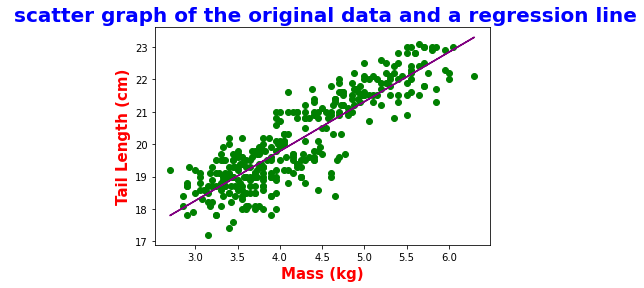

In [105]:
plt.xlabel('Mass (kg)',color='red',fontsize= 15, fontweight='bold')
plt.ylabel('Tail Length (cm)',color='red',fontsize= 15, fontweight='bold')
plt.title(' scatter graph of the original data and a regression line',color='blue',fontsize= 20, fontweight='bold')
plt.scatter(data['Mass (kg)'],data['Tail Length (cm)'],color='green')
trainy=coffi*trainx+inter
plt.plot(trainx,trainy,color='purple')
